# 📊 Análisis Exploratorio de Datos (EDA) - Credit Risk Dataset

Este notebook realiza un análisis exploratorio completo del dataset de riesgo crediticio para entender los patrones de incumplimiento de préstamos.

## Descripción de las Variables

| Feature | Descripción |
|---------|-------------|
| person_age | Edad del solicitante |
| person_income | Ingreso anual |
| person_home_ownership | Tipo de propiedad de vivienda |
| person_emp_length | Años de empleo |
| loan_intent | Propósito del préstamo |
| loan_grade | Grado del préstamo |
| loan_amnt | Monto del préstamo |
| loan_int_rate | Tasa de interés |
| loan_status | Estado del préstamo (0: no default, 1: default) |
| loan_percent_income | Porcentaje del ingreso |
| cb_person_default_on_file | Historial de incumplimiento |
| cb_preson_cred_hist_length | Longitud del historial crediticio |

## 1. Importar Librerías Necesarias

In [26]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuración de visualización
plt.style.use('seaborn')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configuración de pandas para mostrar más columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


## 2. Cargar el Dataset

In [27]:
# Cargar el dataset
df = pd.read_csv('dataset/credit_risk_dataset.csv')

print(f"✅ Dataset cargado exitosamente")
print(f"📊 Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")

✅ Dataset cargado exitosamente
📊 Dimensiones: 32581 filas × 12 columnas


## 3. Vista General del Dataset

In [28]:
# Primeras filas del dataset
print("🔍 Primeras 5 filas del dataset:")
df.head()

🔍 Primeras 5 filas del dataset:


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.00,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.00,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.00,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.00,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.00,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [29]:
# Últimas filas del dataset
print("🔍 Últimas 5 filas del dataset:")
df.tail()

🔍 Últimas 5 filas del dataset:


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.00,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.00,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.00,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.00,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.00,MEDICAL,B,6475,9.99,0,0.15,N,30


In [30]:
# Información general del dataset
print("📋 Información del Dataset:")
print("=" * 50)
df.info()

📋 Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


## 4. Tipos de Datos y Valores Faltantes

In [31]:
# Tipos de datos
print("📊 Tipos de Datos:")
print("=" * 50)
print(df.dtypes)

📊 Tipos de Datos:
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object


In [32]:
# Análisis de valores faltantes
print("❌ Valores Faltantes por Columna:")
print("=" * 50)

missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Valores Faltantes': missing_values,
    'Porcentaje (%)': missing_percent
})

print(missing_df[missing_df['Valores Faltantes'] > 0].sort_values('Porcentaje (%)', ascending=False))
print(f"\n📈 Total de valores faltantes: {df.isnull().sum().sum()}")
print(f"📊 Porcentaje total de datos faltantes: {(df.isnull().sum().sum() / df.size) * 100:.2f}%")

❌ Valores Faltantes por Columna:
                   Valores Faltantes  Porcentaje (%)
loan_int_rate                   3116            9.56
person_emp_length                895            2.75

📈 Total de valores faltantes: 4011
📊 Porcentaje total de datos faltantes: 1.03%


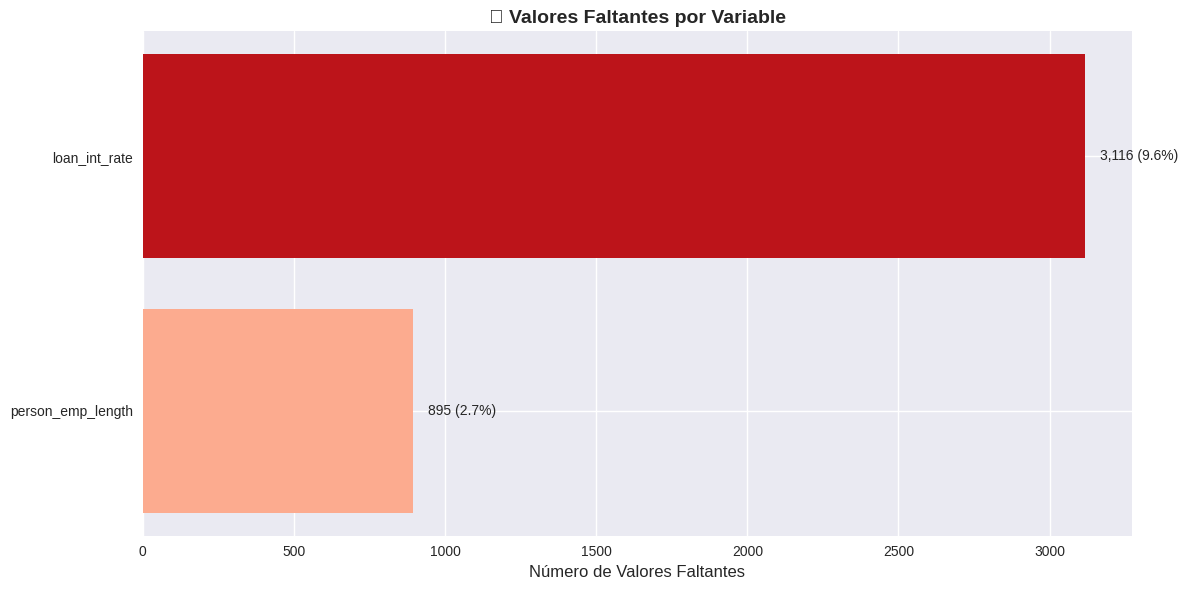

In [33]:
# Visualización de valores faltantes
fig, ax = plt.subplots(figsize=(12, 6))

missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=True)

if len(missing_data) > 0:
    colors = plt.cm.Reds(np.linspace(0.3, 0.8, len(missing_data)))
    bars = ax.barh(missing_data.index, missing_data.values, color=colors)
    
    for bar, val in zip(bars, missing_data.values):
        percentage = (val / len(df)) * 100
        ax.text(val + 50, bar.get_y() + bar.get_height()/2, 
                f'{val:,} ({percentage:.1f}%)', va='center', fontsize=10)
    
    ax.set_xlabel('Número de Valores Faltantes', fontsize=12)
    ax.set_title('🔍 Valores Faltantes por Variable', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("✅ No hay valores faltantes en el dataset")

## 5. Estadísticas Descriptivas

In [34]:
# Estadísticas descriptivas de variables numéricas
print("📊 Estadísticas Descriptivas - Variables Numéricas:")
print("=" * 80)

# Seleccionar solo columnas numéricas
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nVariables numéricas: {numerical_cols}\n")

df[numerical_cols].describe().T

📊 Estadísticas Descriptivas - Variables Numéricas:

Variables numéricas: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']



,count,mean,std,min,25%,50%,75%,max
person_age,32581.00,27.73,6.35,20.00,23.00,26.00,30.00,144.00
person_income,32581.00,66074.85,61983.12,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.00,4.79,4.14,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.00,9589.37,6322.09,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.00,11.01,3.24,5.42,7.90,10.99,13.47,23.22
loan_status,32581.00,0.22,0.41,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.00,0.17,0.11,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.00,5.80,4.06,2.00,3.00,4.00,8.00,30.00


In [35]:
# Estadísticas descriptivas de variables categóricas
print("📊 Estadísticas Descriptivas - Variables Categóricas:")
print("=" * 80)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nVariables categóricas: {categorical_cols}\n")

df[categorical_cols].describe().T

📊 Estadísticas Descriptivas - Variables Categóricas:

Variables categóricas: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']



,count,unique,top,freq
person_home_ownership,32581,4,RENT,16446
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
cb_person_default_on_file,32581,2,N,26836


## 6. Análisis Univariado - Variables Numéricas

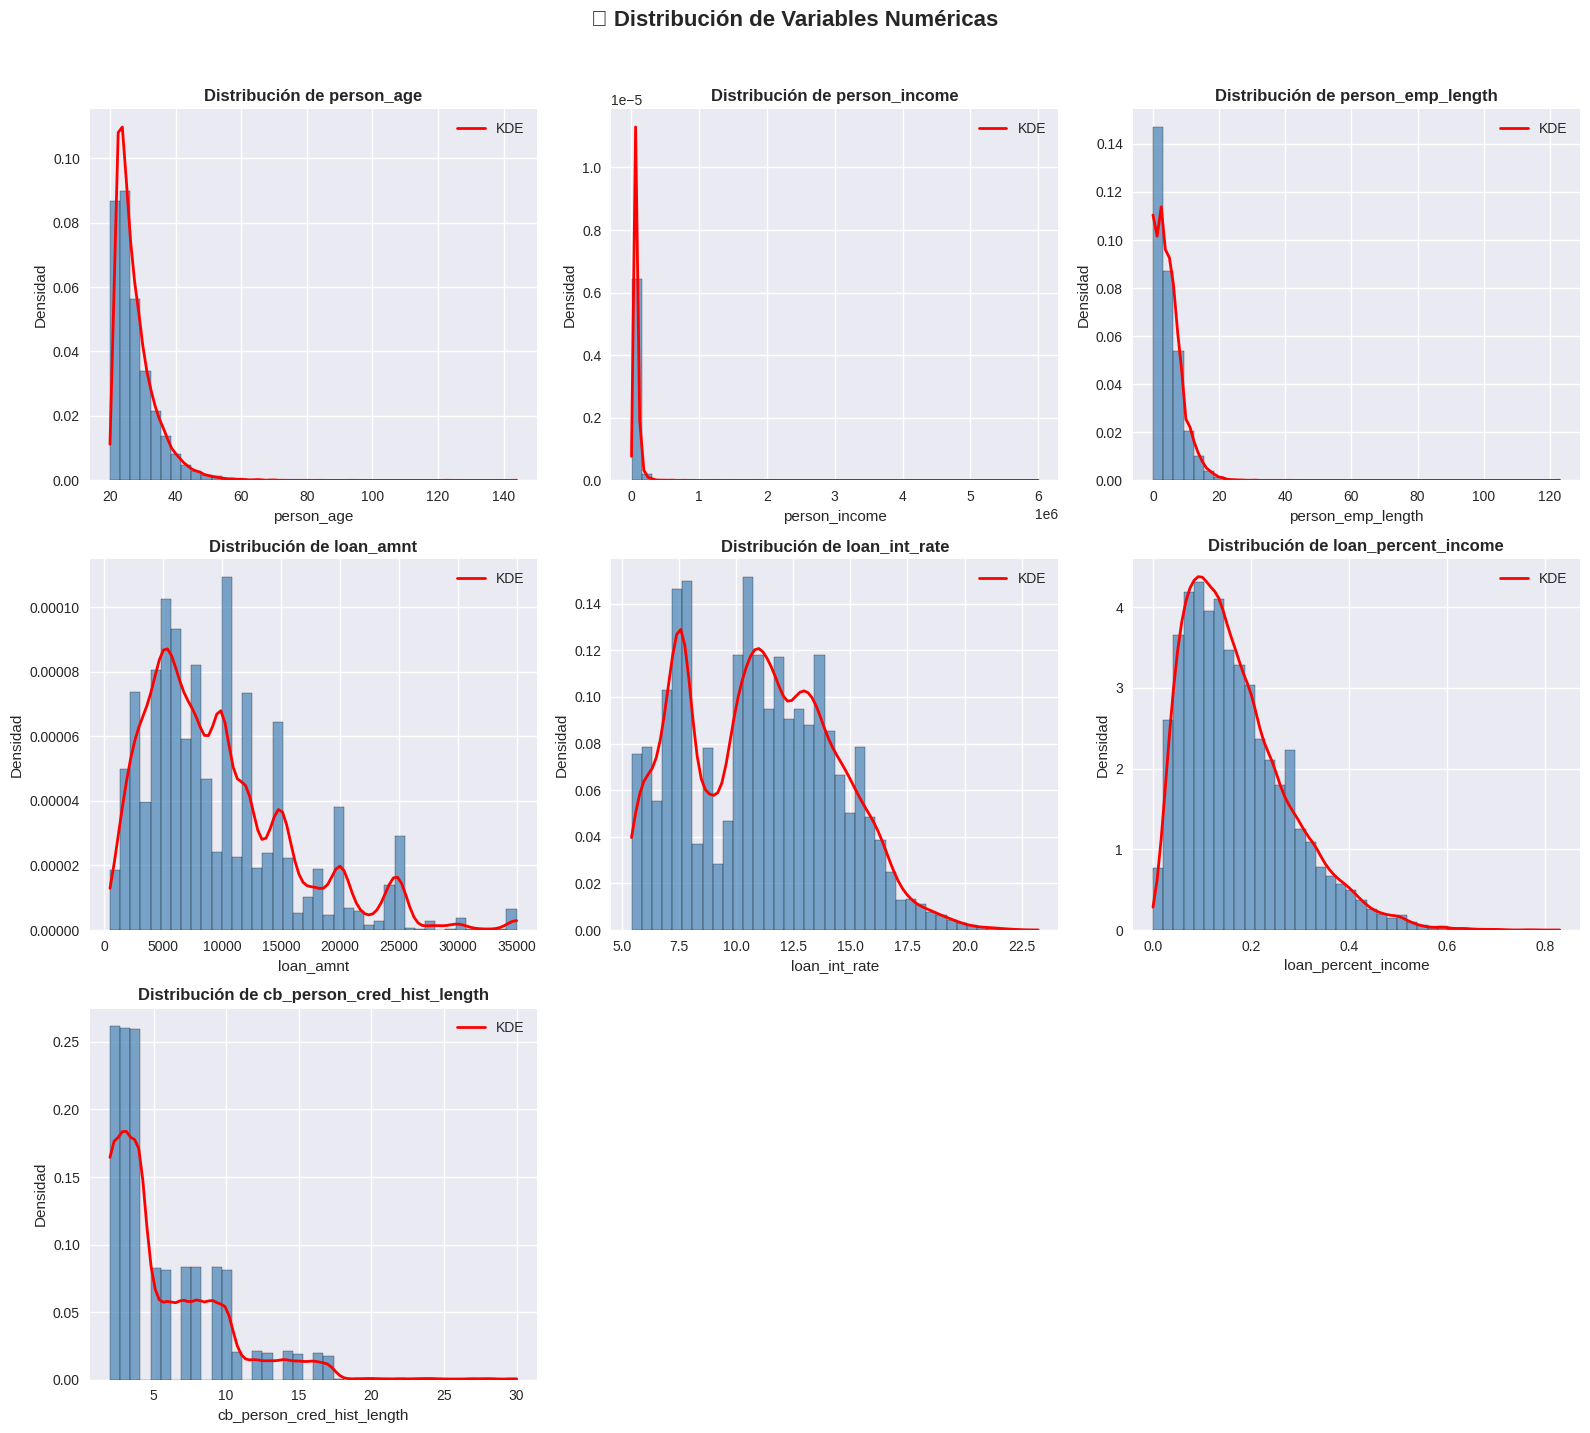

In [36]:
# Distribución de variables numéricas - Histogramas
numerical_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 
                  'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# Filtrar solo columnas que existen
numerical_cols = [col for col in numerical_cols if col in df.columns]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 14))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    
    # Histograma con KDE
    data = df[col].dropna()
    ax.hist(data, bins=40, alpha=0.7, color='steelblue', edgecolor='black', density=True)
    
    # Agregar KDE
    if len(data) > 0:
        from scipy import stats
        kde_x = np.linspace(data.min(), data.max(), 100)
        kde = stats.gaussian_kde(data)
        ax.plot(kde_x, kde(kde_x), color='red', linewidth=2, label='KDE')
    
    ax.set_title(f'Distribución de {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Densidad')
    ax.legend()

# Ocultar ejes vacíos
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('📊 Distribución de Variables Numéricas', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

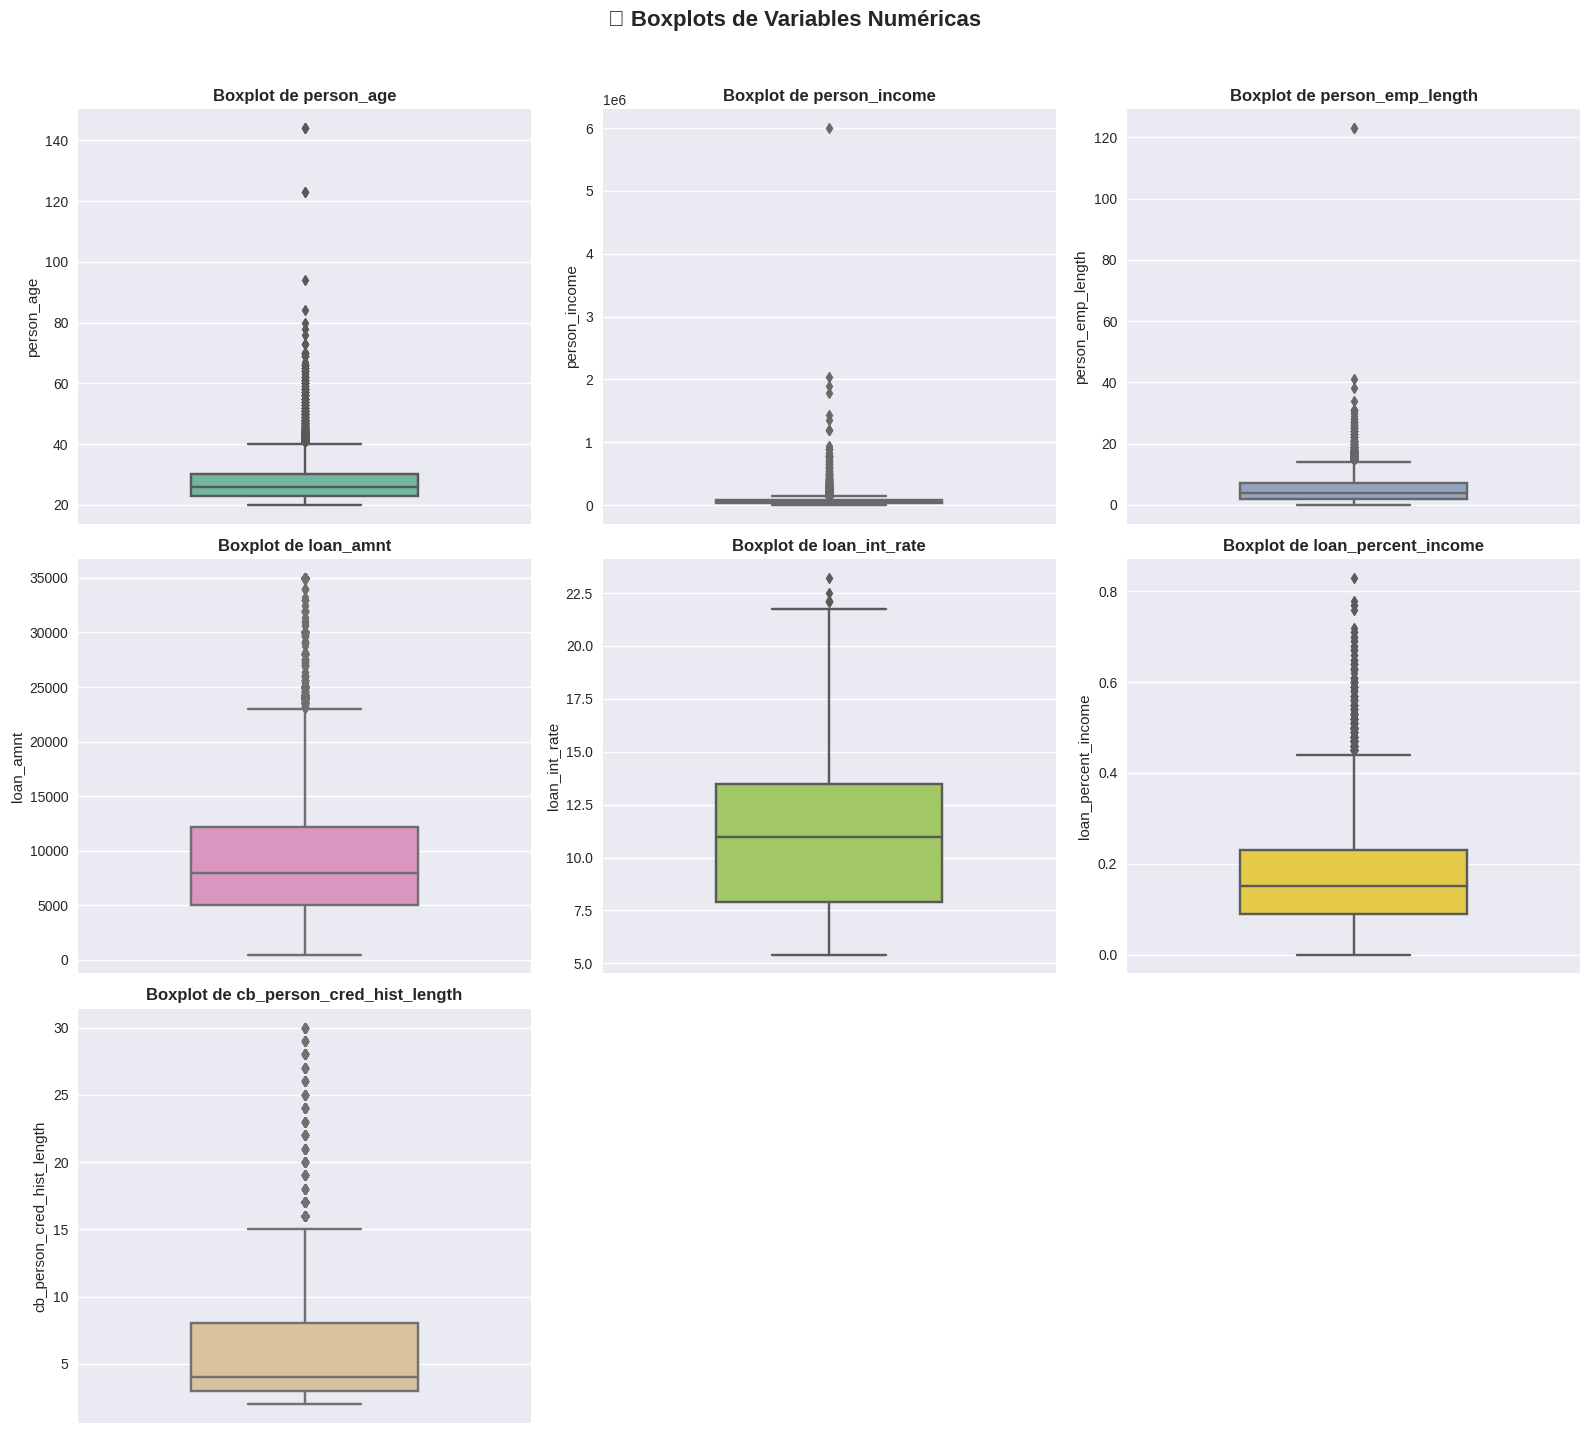

In [37]:
# Boxplots de variables numéricas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 14))
axes = axes.flatten()

colors = sns.color_palette("Set2", len(numerical_cols))

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    
    sns.boxplot(data=df, y=col, ax=ax, color=colors[idx], width=0.5)
    ax.set_title(f'Boxplot de {col}', fontsize=12, fontweight='bold')
    ax.set_ylabel(col)

# Ocultar ejes vacíos
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('📦 Boxplots de Variables Numéricas', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 7. Análisis Univariado - Variables Categóricas

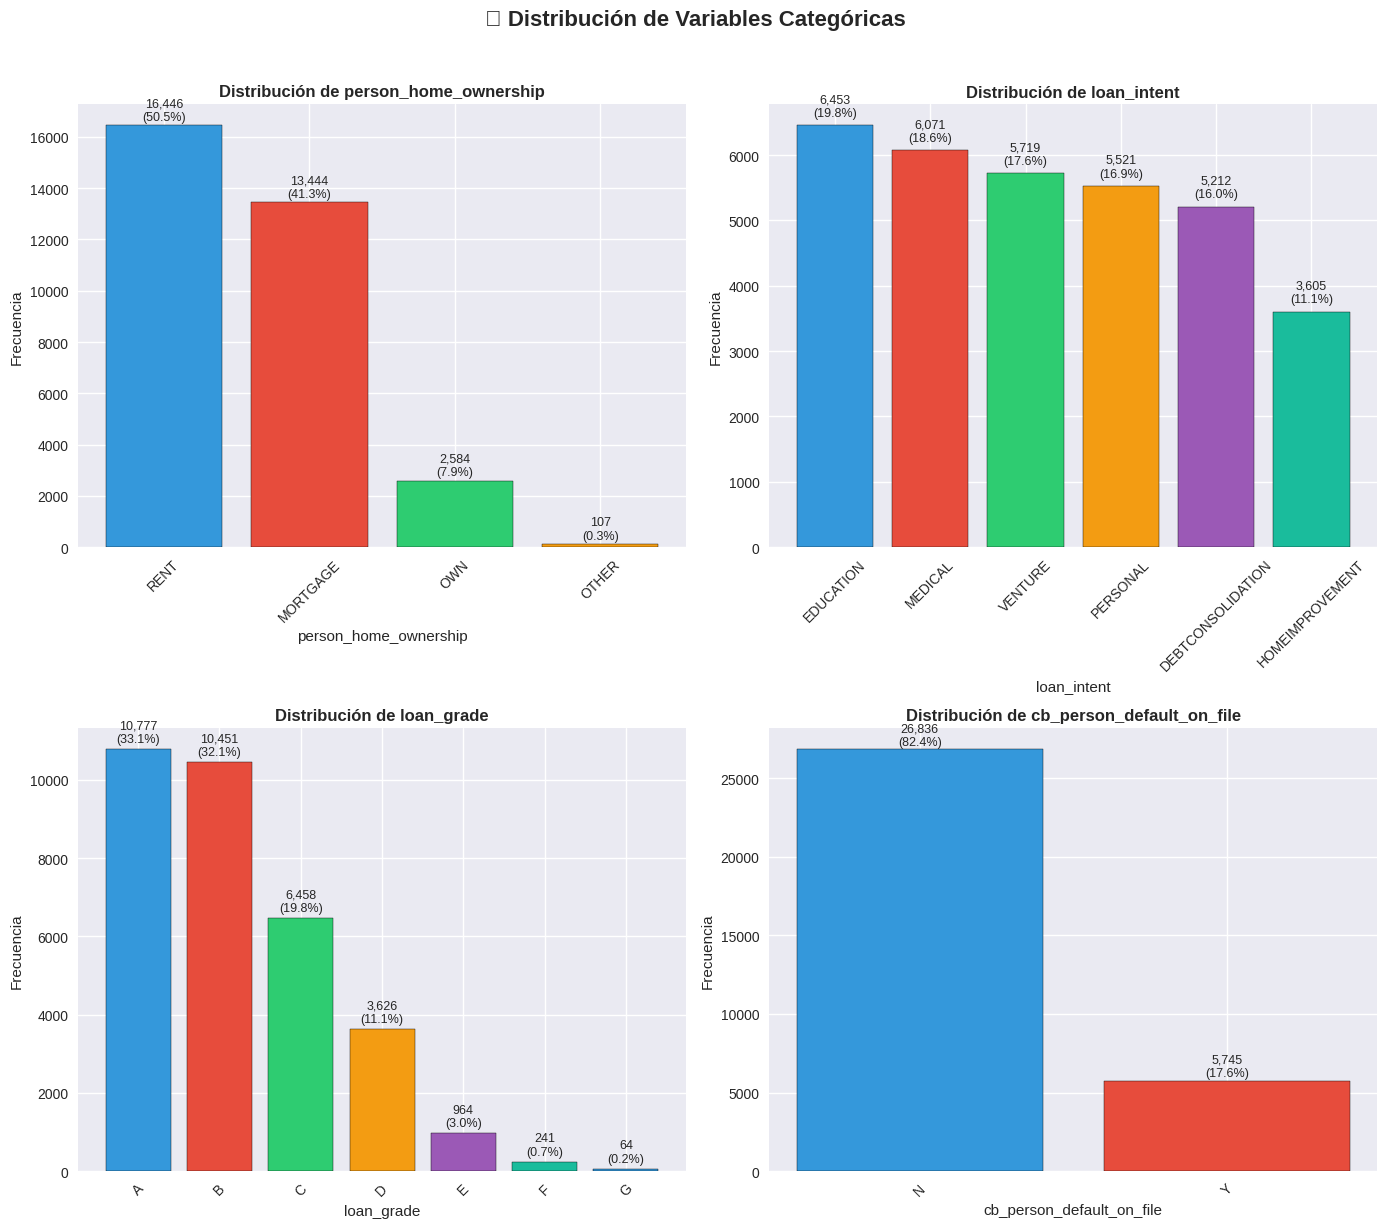

In [38]:
# Distribución de variables categóricas
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
categorical_cols = [col for col in categorical_cols if col in df.columns]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
axes = axes.flatten()

colors_palette = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c']

for idx, col in enumerate(categorical_cols):
    ax = axes[idx]
    
    # Contar valores
    value_counts = df[col].value_counts()
    
    # Crear gráfico de barras
    bars = ax.bar(value_counts.index, value_counts.values, color=colors_palette[:len(value_counts)], edgecolor='black')
    
    # Agregar etiquetas
    for bar, val in zip(bars, value_counts.values):
        percentage = (val / len(df)) * 100
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
                f'{val:,}\n({percentage:.1f}%)', ha='center', va='bottom', fontsize=9)
    
    ax.set_title(f'Distribución de {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')
    ax.tick_params(axis='x', rotation=45)

plt.suptitle('📊 Distribución de Variables Categóricas', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [39]:
# Valores únicos por variable categórica
print("📋 Valores Únicos por Variable Categórica:")
print("=" * 60)

for col in categorical_cols:
    print(f"\n🔹 {col}:")
    print(df[col].value_counts())

📋 Valores Únicos por Variable Categórica:

🔹 person_home_ownership:
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

🔹 loan_intent:
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

🔹 loan_grade:
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

🔹 cb_person_default_on_file:
N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64


## 8. Distribución de la Variable Objetivo (loan_status)

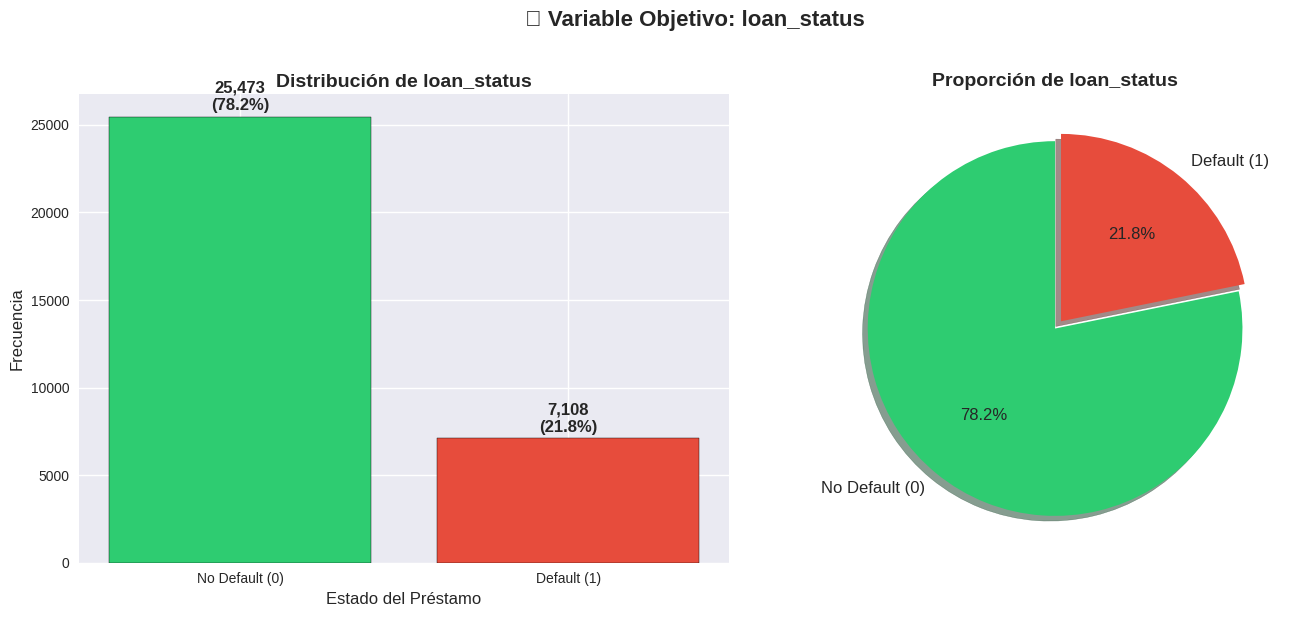


📊 Ratio de Desbalance (No Default : Default): 3.58 : 1
✅ Clase mayoritaria (No Default): 25,473 (78.18%)
❌ Clase minoritaria (Default): 7,108 (21.82%)


In [40]:
# Distribución de la variable objetivo
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Countplot
ax1 = axes[0]
target_counts = df['loan_status'].value_counts()
colors = ['#2ecc71', '#e74c3c']
bars = ax1.bar(target_counts.index, target_counts.values, color=colors, edgecolor='black')

for bar, val in zip(bars, target_counts.values):
    percentage = (val / len(df)) * 100
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200, 
             f'{val:,}\n({percentage:.1f}%)', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax1.set_xlabel('Estado del Préstamo', fontsize=12)
ax1.set_ylabel('Frecuencia', fontsize=12)
ax1.set_title('Distribución de loan_status', fontsize=14, fontweight='bold')
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['No Default (0)', 'Default (1)'])

# Pie chart
ax2 = axes[1]
ax2.pie(target_counts.values, labels=['No Default (0)', 'Default (1)'], 
        autopct='%1.1f%%', colors=colors, explode=[0, 0.05],
        shadow=True, startangle=90, textprops={'fontsize': 12})
ax2.set_title('Proporción de loan_status', fontsize=14, fontweight='bold')

plt.suptitle('🎯 Variable Objetivo: loan_status', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Calcular ratio de desbalance
ratio = target_counts[0] / target_counts[1]
print(f"\n📊 Ratio de Desbalance (No Default : Default): {ratio:.2f} : 1")
print(f"✅ Clase mayoritaria (No Default): {target_counts[0]:,} ({target_counts[0]/len(df)*100:.2f}%)")
print(f"❌ Clase minoritaria (Default): {target_counts[1]:,} ({target_counts[1]/len(df)*100:.2f}%)")

## 9. Análisis Bivariado - Variables Numéricas vs Variable Objetivo

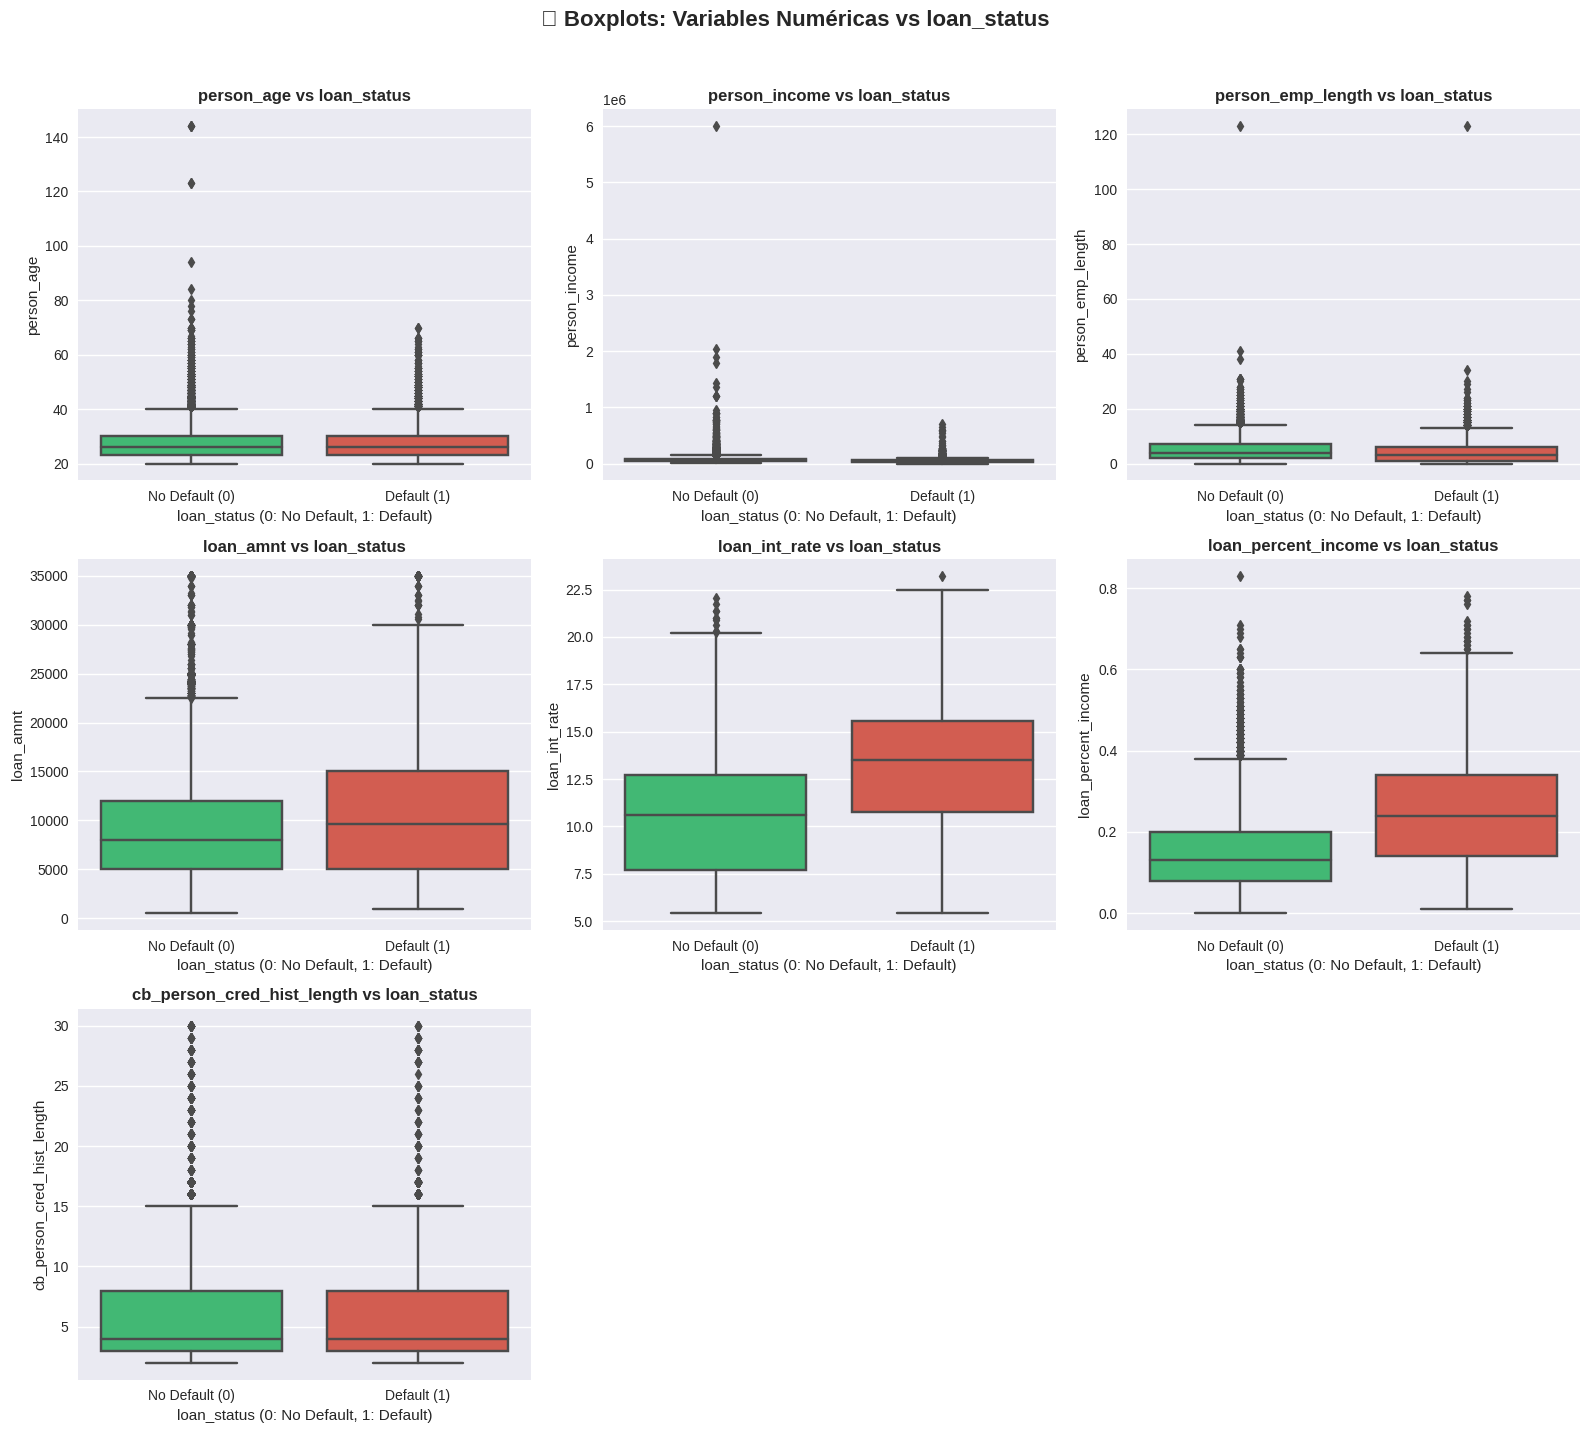

In [41]:
# Boxplots: Variables numéricas vs loan_status
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 14))
axes = axes.flatten()

colors = ['#2ecc71', '#e74c3c']

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    
    sns.boxplot(data=df, x='loan_status', y=col, ax=ax, palette=colors)
    ax.set_title(f'{col} vs loan_status', fontsize=12, fontweight='bold')
    ax.set_xlabel('loan_status (0: No Default, 1: Default)')
    ax.set_ylabel(col)
    ax.set_xticklabels(['No Default (0)', 'Default (1)'])

# Ocultar ejes vacíos
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('📊 Boxplots: Variables Numéricas vs loan_status', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

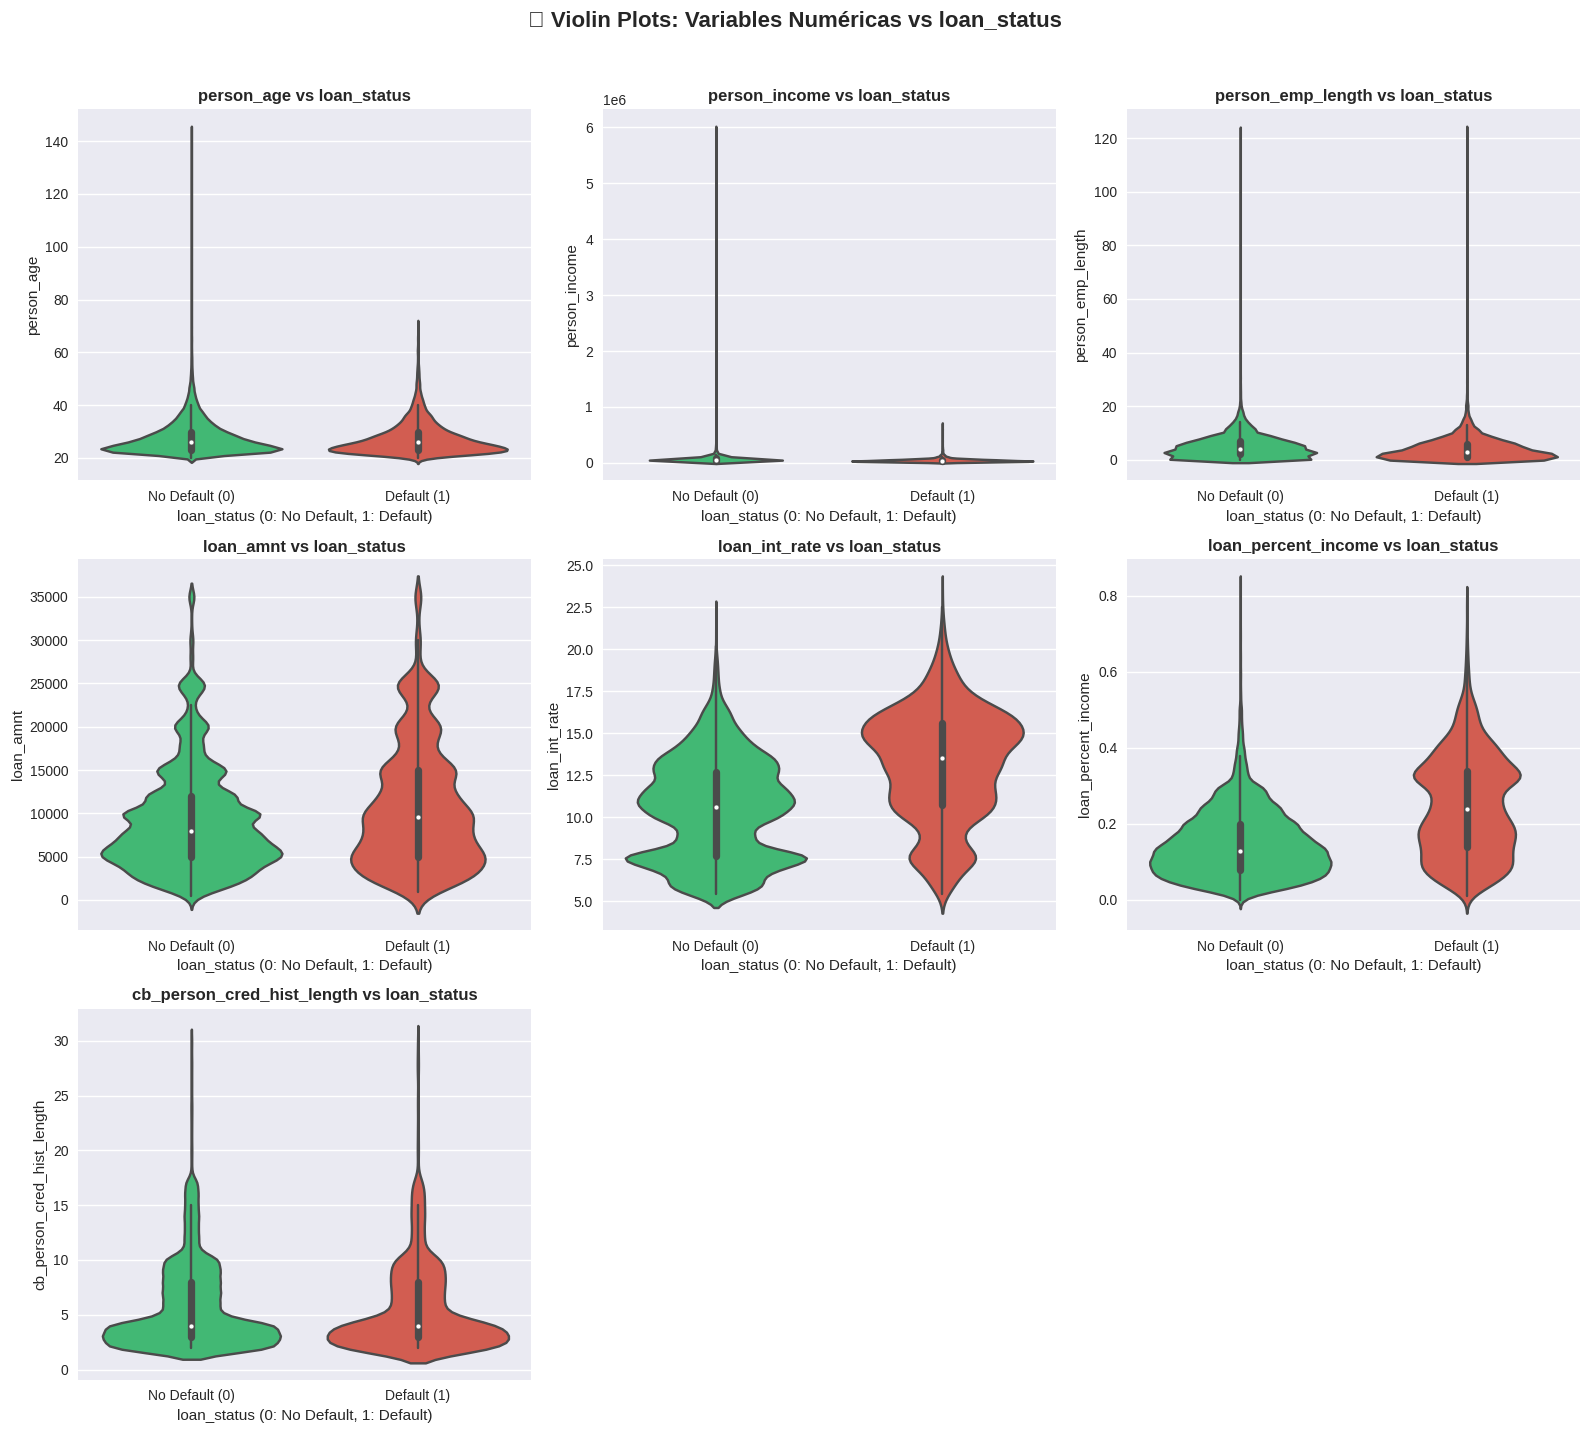

In [42]:
# Violin plots: Variables numéricas vs loan_status
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 14))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    
    sns.violinplot(data=df, x='loan_status', y=col, ax=ax, palette=colors, inner='box')
    ax.set_title(f'{col} vs loan_status', fontsize=12, fontweight='bold')
    ax.set_xlabel('loan_status (0: No Default, 1: Default)')
    ax.set_ylabel(col)
    ax.set_xticklabels(['No Default (0)', 'Default (1)'])

# Ocultar ejes vacíos
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('🎻 Violin Plots: Variables Numéricas vs loan_status', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [43]:
# Estadísticas por grupo (Default vs No Default)
print("📊 Estadísticas por Grupo (loan_status):")
print("=" * 80)

stats_by_group = df.groupby('loan_status')[numerical_cols].agg(['mean', 'median', 'std'])
stats_by_group

📊 Estadísticas por Grupo (loan_status):


person_age             person_income                    \
                  mean median  std          mean   median      std   
loan_status                                                          
0                27.81  26.00 6.37      70804.36 60000.00 66568.80   
1                27.47  26.00 6.26      49125.65 41498.00 36907.38   

            person_emp_length             loan_amnt                  \
                         mean median  std      mean  median     std   
loan_status                                                           
0                        4.97   4.00 4.13   9237.46 8000.00 6026.38   
1                        4.14   3.00 4.13  10850.50 9600.00 7143.35   

            loan_int_rate             loan_percent_income              \
                     mean median  std                mean median  std   
loan_status                                                             
0                   10.44  10.59 2.98                0.15   0.13 0.09   
1                   13.06  13.49 3.29                0.25   0.24 0.13   

            cb_person_cred_hist_length              
                                  mean median  std  
loan_status                                         
0                                 5.84   4.00 4.04  
1                                 5.69   4.00 4.10

## 10. Análisis Bivariado - Variables Categóricas vs Variable Objetivo

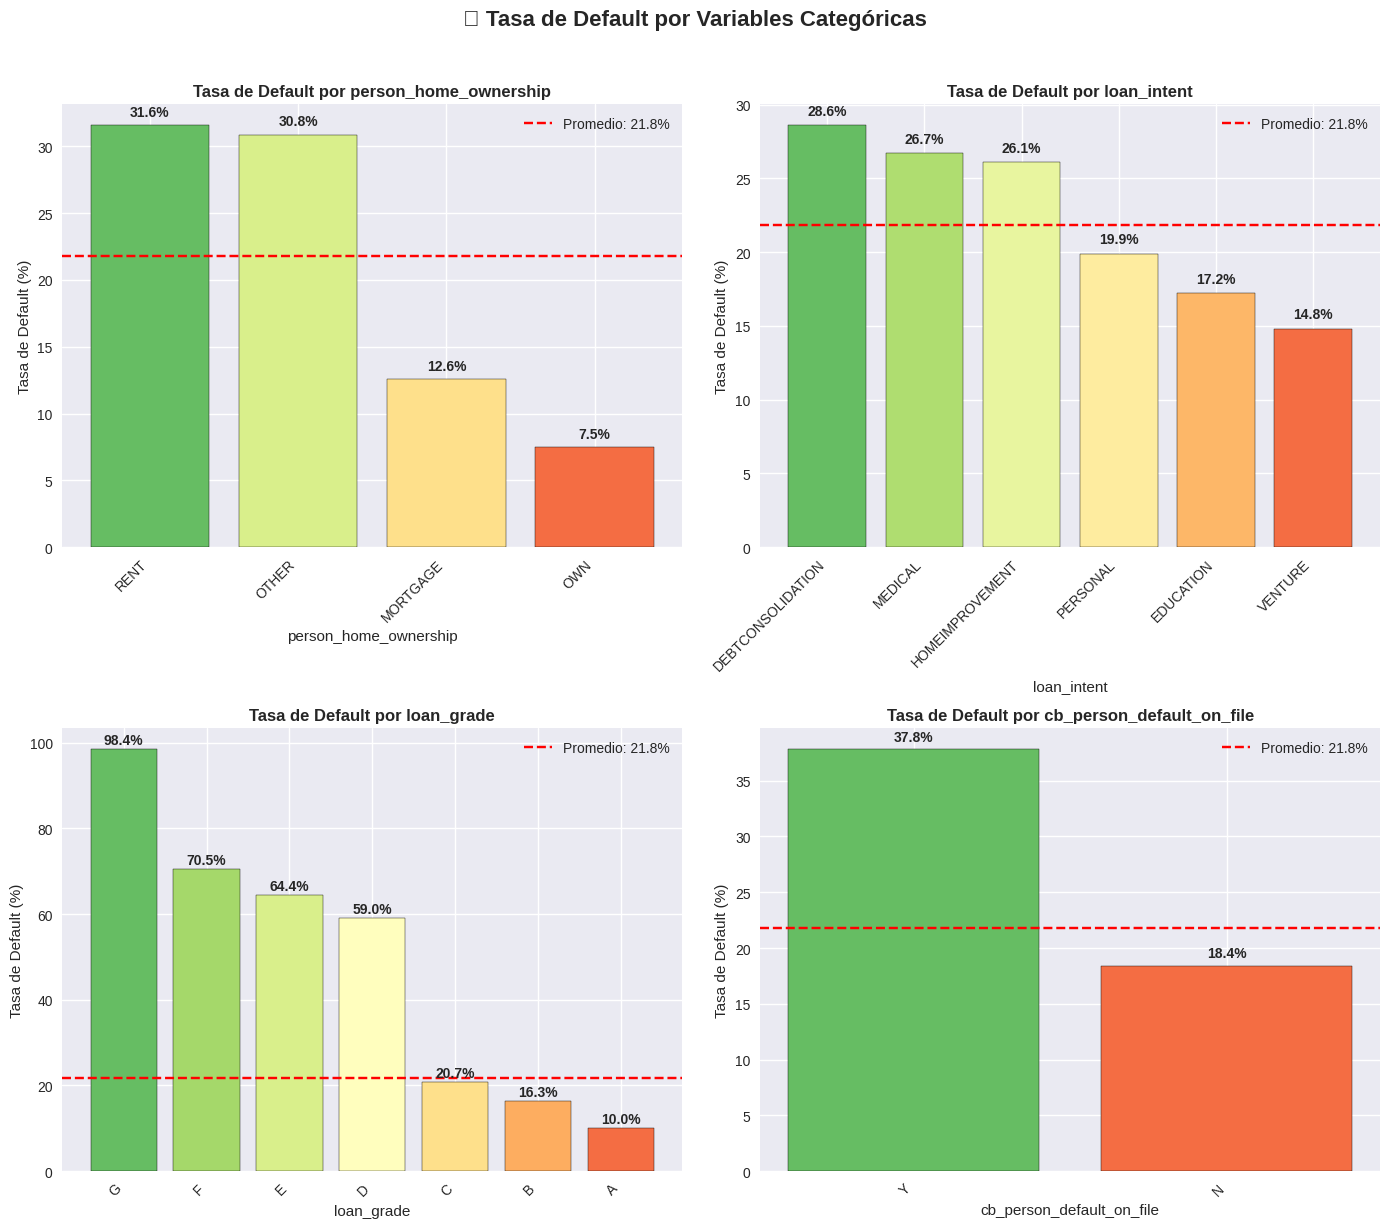

In [44]:
# Tasa de default por variable categórica
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    ax = axes[idx]
    
    # Calcular tasa de default por categoría
    default_rate = df.groupby(col)['loan_status'].mean().sort_values(ascending=False)
    
    # Crear gráfico de barras
    colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(default_rate)))
    bars = ax.bar(range(len(default_rate)), default_rate.values * 100, color=colors, edgecolor='black')
    
    # Agregar etiquetas
    for bar, val in zip(bars, default_rate.values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                f'{val*100:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    ax.set_xticks(range(len(default_rate)))
    ax.set_xticklabels(default_rate.index, rotation=45, ha='right')
    ax.set_xlabel(col)
    ax.set_ylabel('Tasa de Default (%)')
    ax.set_title(f'Tasa de Default por {col}', fontsize=12, fontweight='bold')
    ax.axhline(y=df['loan_status'].mean()*100, color='red', linestyle='--', label=f'Promedio: {df["loan_status"].mean()*100:.1f}%')
    ax.legend()

plt.suptitle('📊 Tasa de Default por Variables Categóricas', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

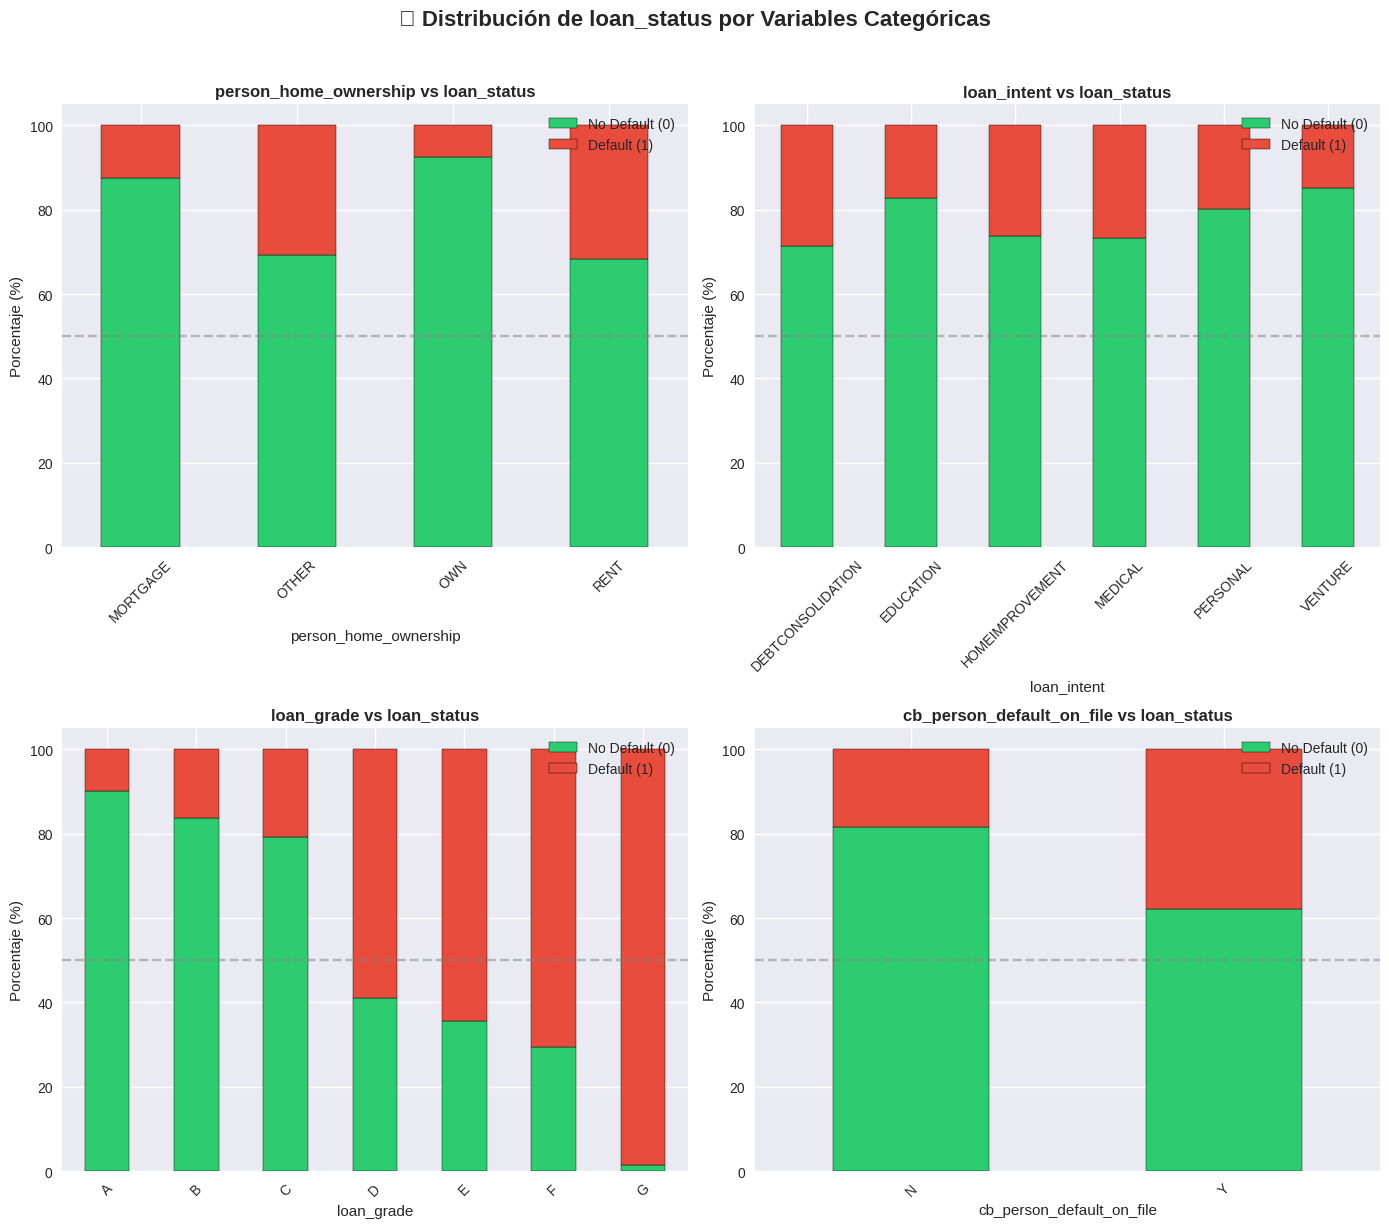

In [45]:
# Stacked bar plots: Variables categóricas vs loan_status
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    ax = axes[idx]
    
    # Crear tabla cruzada
    crosstab = pd.crosstab(df[col], df['loan_status'], normalize='index') * 100
    
    # Crear gráfico de barras apiladas
    crosstab.plot(kind='bar', stacked=True, ax=ax, color=['#2ecc71', '#e74c3c'], edgecolor='black')
    
    ax.set_xlabel(col)
    ax.set_ylabel('Porcentaje (%)')
    ax.set_title(f'{col} vs loan_status', fontsize=12, fontweight='bold')
    ax.legend(['No Default (0)', 'Default (1)'], loc='upper right')
    ax.tick_params(axis='x', rotation=45)
    
    # Agregar línea horizontal en 50%
    ax.axhline(y=50, color='gray', linestyle='--', alpha=0.5)

plt.suptitle('📊 Distribución de loan_status por Variables Categóricas', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [46]:
# Tablas cruzadas detalladas
print("📋 Tablas Cruzadas Detalladas:")
print("=" * 80)

for col in categorical_cols:
    print(f"\n🔹 {col} vs loan_status:")
    crosstab = pd.crosstab(df[col], df['loan_status'], margins=True, margins_name='Total')
    crosstab.columns = ['No Default (0)', 'Default (1)', 'Total']
    print(crosstab)
    print("-" * 50)

📋 Tablas Cruzadas Detalladas:

🔹 person_home_ownership vs loan_status:
                       No Default (0)  Default (1)  Total
person_home_ownership                                    
MORTGAGE                        11754         1690  13444
OTHER                              74           33    107
OWN                              2391          193   2584
RENT                            11254         5192  16446
Total                           25473         7108  32581
--------------------------------------------------

🔹 loan_intent vs loan_status:
                   No Default (0)  Default (1)  Total
loan_intent                                          
DEBTCONSOLIDATION            3722         1490   5212
EDUCATION                    5342         1111   6453
HOMEIMPROVEMENT              2664          941   3605
MEDICAL                      4450         1621   6071
PERSONAL                     4423         1098   5521
VENTURE                      4872          847   5719
Total    

## 11. Análisis de Correlación

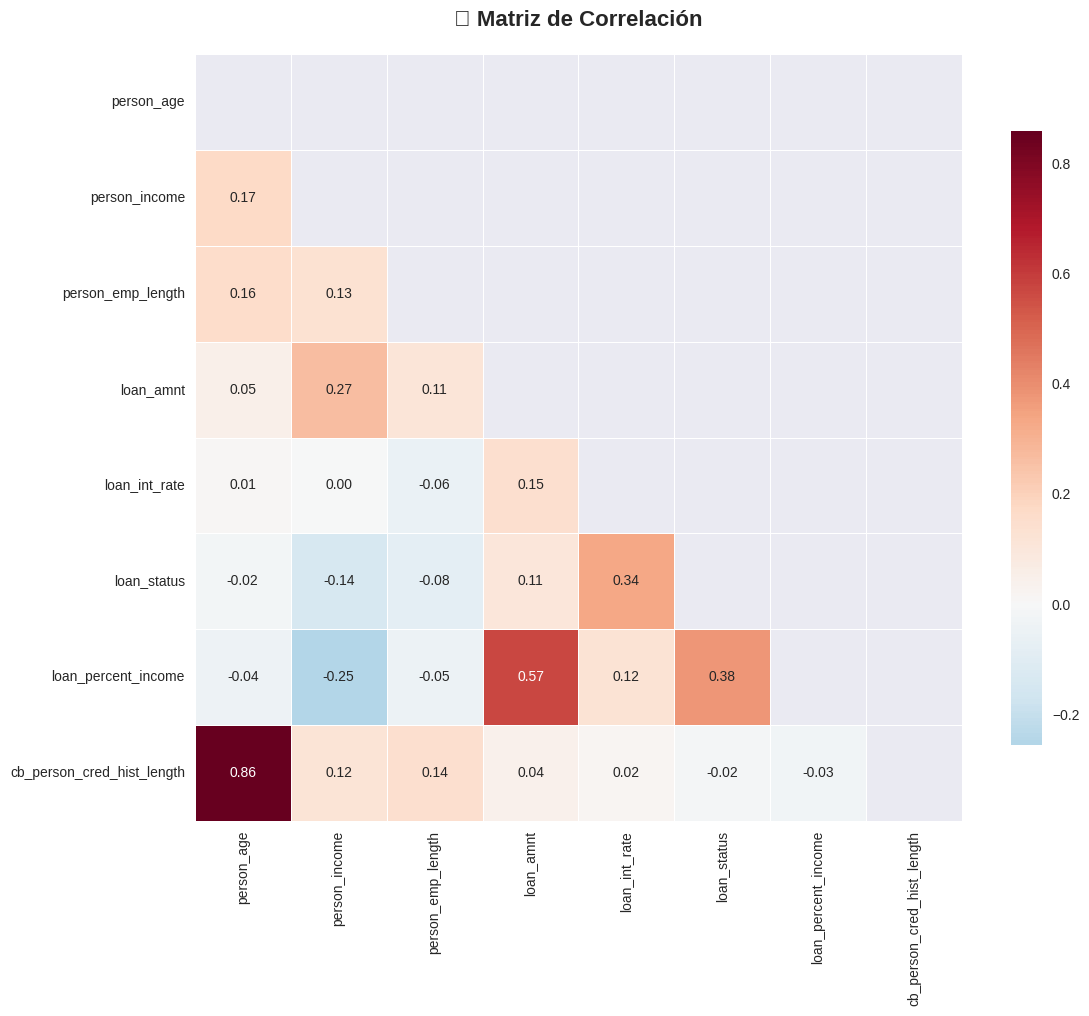

In [47]:
# Matriz de correlación
numerical_df = df.select_dtypes(include=[np.number])

correlation_matrix = numerical_df.corr()

# Crear heatmap
fig, ax = plt.subplots(figsize=(12, 10))

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='RdBu_r', center=0, linewidths=0.5,
            square=True, ax=ax, cbar_kws={"shrink": 0.8},
            annot_kws={"size": 10})

ax.set_title('🔥 Matriz de Correlación', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

📊 Correlaciones con loan_status:


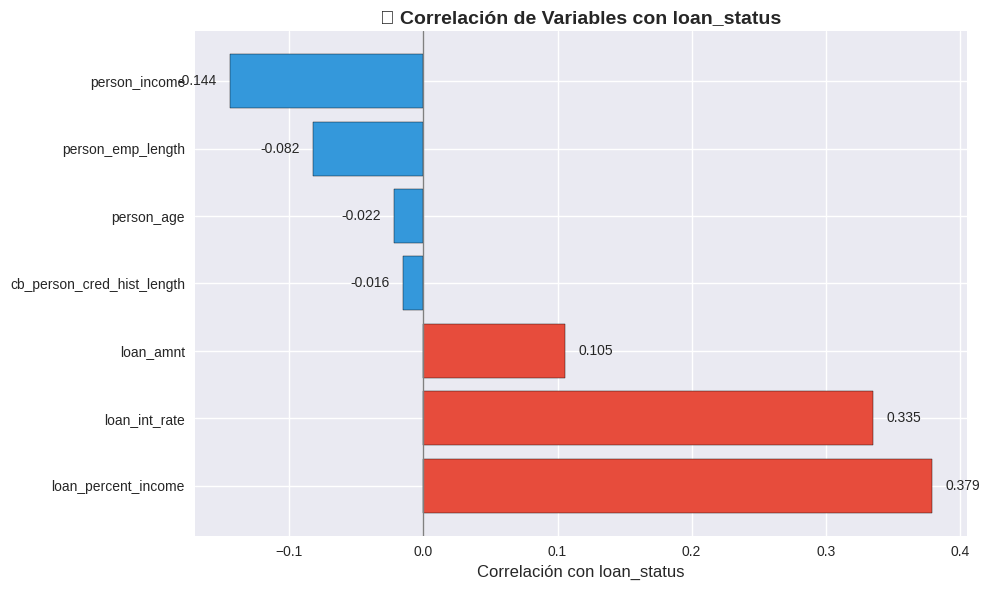

loan_percent_income           0.38
loan_int_rate                 0.34
loan_amnt                     0.11
cb_person_cred_hist_length   -0.02
person_age                   -0.02
person_emp_length            -0.08
person_income                -0.14
Name: loan_status, dtype: float64


In [48]:
# Correlaciones con la variable objetivo
print("📊 Correlaciones con loan_status:")
print("=" * 50)

correlations_with_target = correlation_matrix['loan_status'].drop('loan_status').sort_values(ascending=False)

# Visualizar
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#e74c3c' if x > 0 else '#3498db' for x in correlations_with_target.values]
bars = ax.barh(correlations_with_target.index, correlations_with_target.values, color=colors, edgecolor='black')

ax.axvline(x=0, color='gray', linestyle='-', linewidth=1)
ax.set_xlabel('Correlación con loan_status', fontsize=12)
ax.set_title('📊 Correlación de Variables con loan_status', fontsize=14, fontweight='bold')

for bar, val in zip(bars, correlations_with_target.values):
    ax.text(val + 0.01 if val > 0 else val - 0.01, bar.get_y() + bar.get_height()/2, 
            f'{val:.3f}', va='center', ha='left' if val > 0 else 'right', fontsize=10)

plt.tight_layout()
plt.show()

print(correlations_with_target)

🔍 Pairplot de las variables más correlacionadas: ['loan_percent_income', 'loan_int_rate', 'person_income', 'loan_amnt']


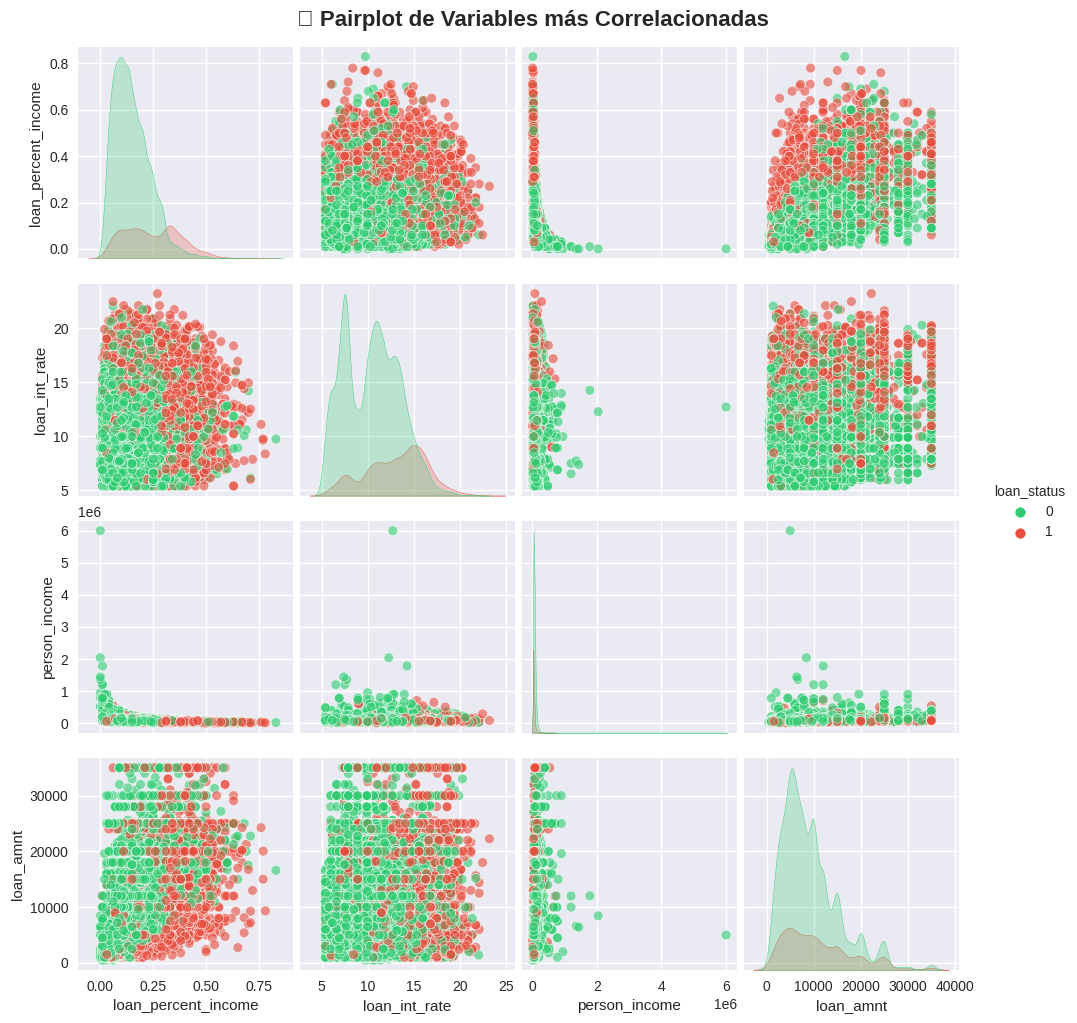

In [49]:
# Pairplot para variables más correlacionadas
top_corr_features = correlations_with_target.abs().nlargest(4).index.tolist()
top_corr_features.append('loan_status')

print(f"🔍 Pairplot de las variables más correlacionadas: {top_corr_features[:-1]}")

g = sns.pairplot(df[top_corr_features].dropna(), hue='loan_status', 
                 palette=['#2ecc71', '#e74c3c'], diag_kind='kde', 
                 plot_kws={'alpha': 0.6})
g.fig.suptitle('📊 Pairplot de Variables más Correlacionadas', y=1.02, fontsize=16, fontweight='bold')
plt.show()

## 12. Detección de Outliers

In [50]:
# Función para detectar outliers usando IQR
def detect_outliers_iqr(df, column):
    """Detecta outliers usando el método IQR"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'n_outliers': len(outliers),
        'percent_outliers': (len(outliers) / len(df)) * 100
    }

# Detectar outliers en cada variable numérica
print("🔍 Detección de Outliers (Método IQR):")
print("=" * 80)

outlier_summary = []
for col in numerical_cols:
    stats = detect_outliers_iqr(df, col)
    outlier_summary.append({
        'Variable': col,
        'Q1': stats['Q1'],
        'Q3': stats['Q3'],
        'IQR': stats['IQR'],
        'Límite Inferior': stats['lower_bound'],
        'Límite Superior': stats['upper_bound'],
        'N° Outliers': stats['n_outliers'],
        '% Outliers': stats['percent_outliers']
    })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df

🔍 Detección de Outliers (Método IQR):


,Variable,Q1,Q3,IQR,Límite Inferior,Límite Superior,N° Outliers,% Outliers
0,person_age,23.00,30.00,7.00,12.50,40.50,1494,4.59
1,person_income,38500.00,79200.00,40700.00,-22550.00,140250.00,1484,4.55
2,person_emp_length,2.00,7.00,5.00,-5.50,14.50,853,2.62
3,loan_amnt,5000.00,12200.00,7200.00,-5800.00,23000.00,1689,5.18
4,loan_int_rate,7.90,13.47,5.57,-0.46,21.83,6,0.02
5,loan_percent_income,0.09,0.23,0.14,-0.12,0.44,651,2.00
6,cb_person_cred_hist_length,3.00,8.00,5.00,-4.50,15.50,1142,3.51


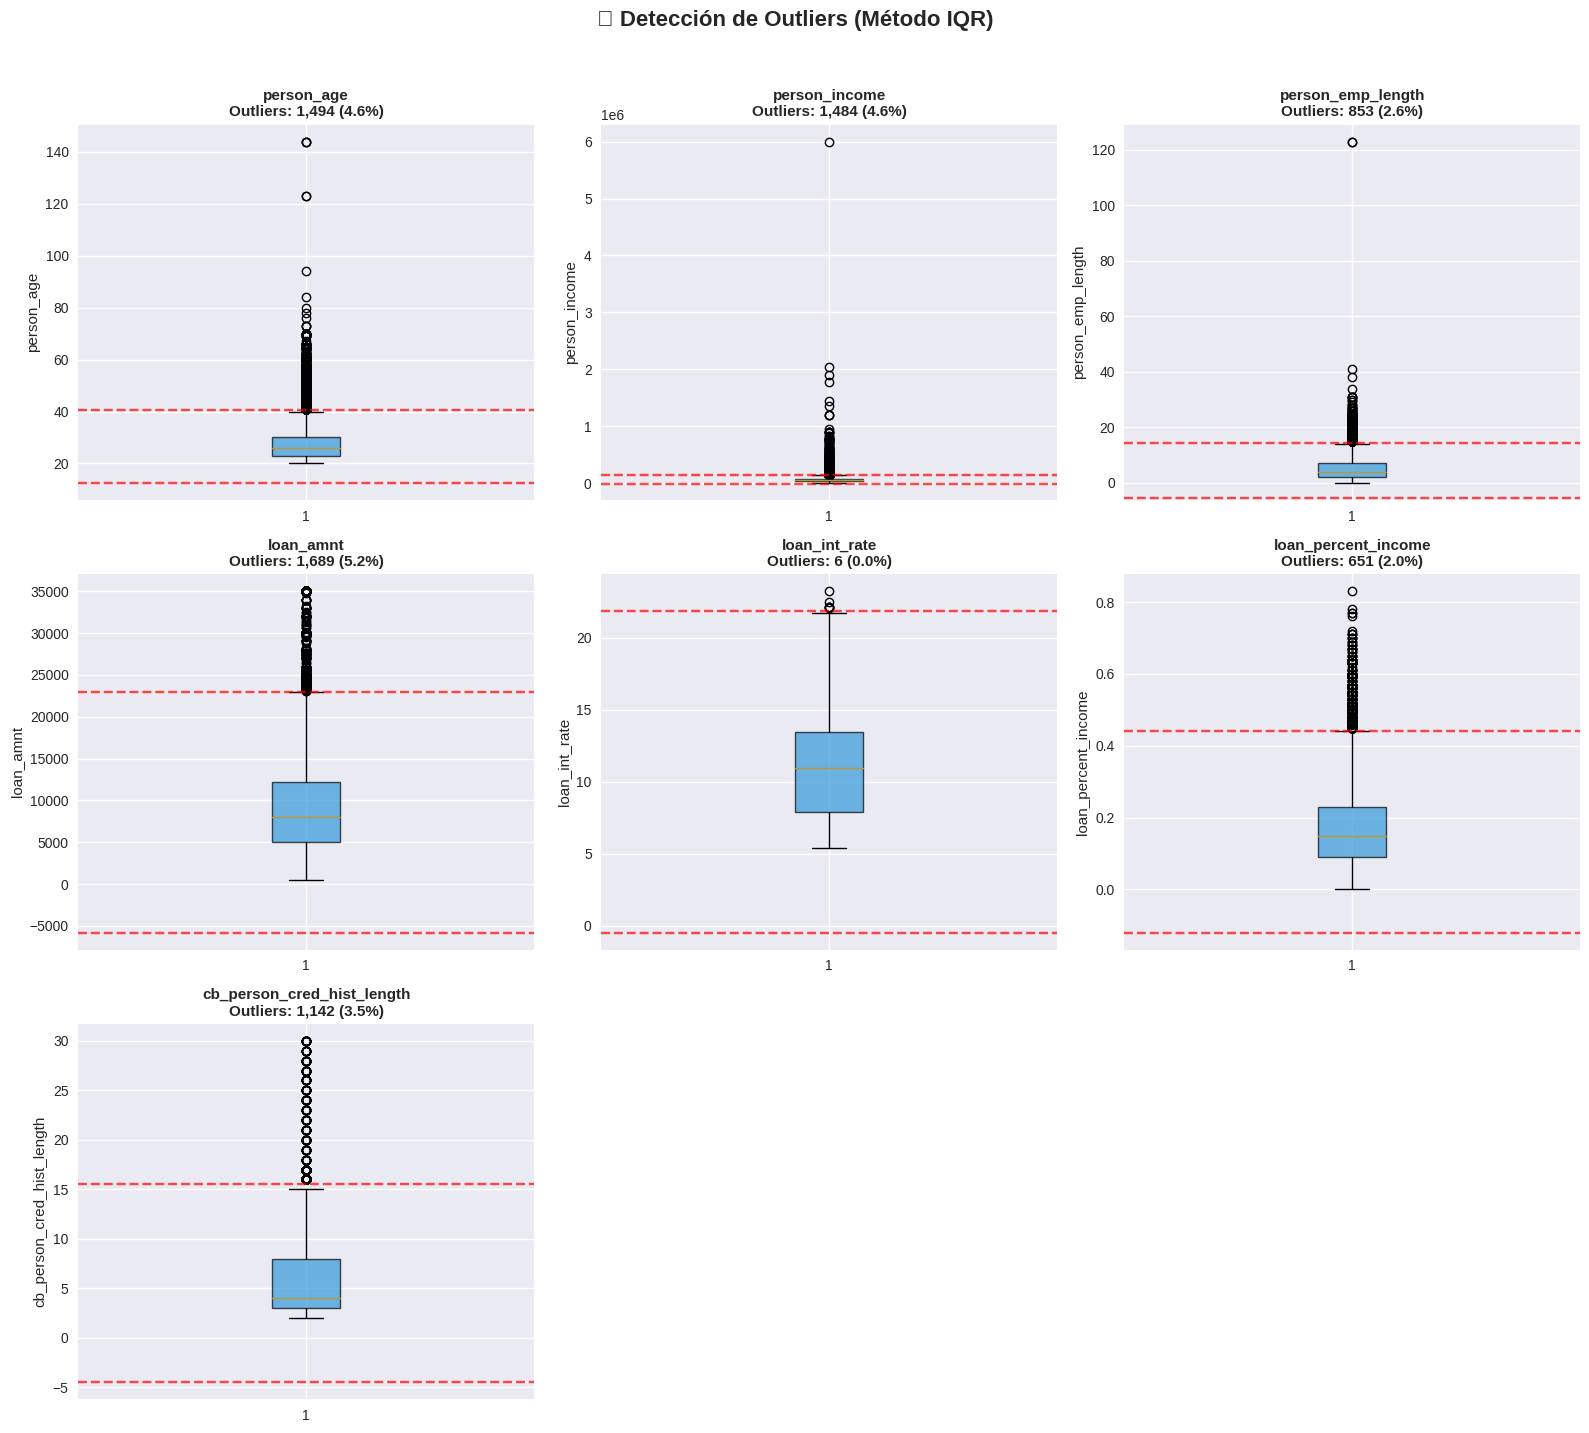

In [51]:
# Visualización de outliers con boxplots mejorados
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 14))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    
    # Obtener estadísticas de outliers
    stats = detect_outliers_iqr(df, col)
    
    # Boxplot
    bp = ax.boxplot(df[col].dropna(), vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('#3498db')
    bp['boxes'][0].set_alpha(0.7)
    
    # Agregar información de outliers
    ax.set_title(f'{col}\nOutliers: {stats["n_outliers"]:,} ({stats["percent_outliers"]:.1f}%)', 
                 fontsize=11, fontweight='bold')
    ax.set_ylabel(col)
    
    # Agregar líneas de límites
    ax.axhline(y=stats['lower_bound'], color='red', linestyle='--', alpha=0.7, label='Límites IQR')
    ax.axhline(y=stats['upper_bound'], color='red', linestyle='--', alpha=0.7)

# Ocultar ejes vacíos
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('📦 Detección de Outliers (Método IQR)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

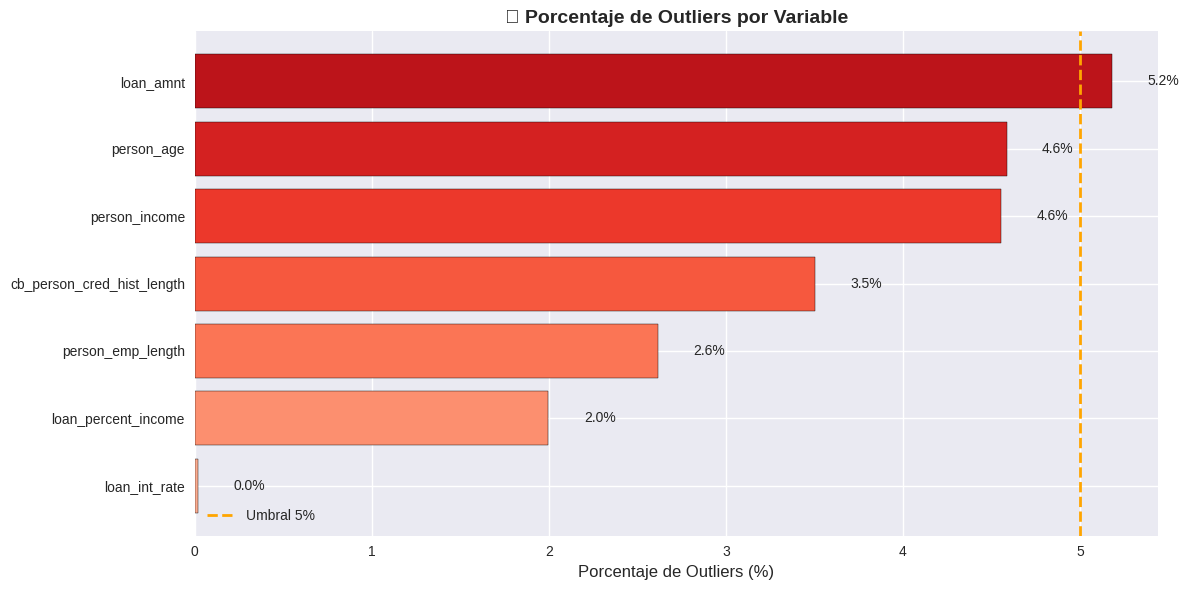

In [52]:
# Visualización del porcentaje de outliers por variable
fig, ax = plt.subplots(figsize=(12, 6))

outlier_pcts = outlier_df.sort_values('% Outliers', ascending=True)
colors = plt.cm.Reds(np.linspace(0.3, 0.8, len(outlier_pcts)))

bars = ax.barh(outlier_pcts['Variable'], outlier_pcts['% Outliers'], color=colors, edgecolor='black')

for bar, val in zip(bars, outlier_pcts['% Outliers']):
    ax.text(val + 0.2, bar.get_y() + bar.get_height()/2, 
            f'{val:.1f}%', va='center', fontsize=10)

ax.set_xlabel('Porcentaje de Outliers (%)', fontsize=12)
ax.set_title('📊 Porcentaje de Outliers por Variable', fontsize=14, fontweight='bold')
ax.axvline(x=5, color='orange', linestyle='--', label='Umbral 5%', linewidth=2)
ax.legend()
plt.tight_layout()
plt.show()

## 📝 Resumen y Conclusiones

In [53]:
# Resumen final del EDA
print("=" * 80)
print("📊 RESUMEN DEL ANÁLISIS EXPLORATORIO DE DATOS (EDA)")
print("=" * 80)

print(f"\n📁 INFORMACIÓN DEL DATASET:")
print(f"   • Número de registros: {df.shape[0]:,}")
print(f"   • Número de variables: {df.shape[1]}")
print(f"   • Variables numéricas: {len(df.select_dtypes(include=[np.number]).columns)}")
print(f"   • Variables categóricas: {len(df.select_dtypes(include=['object']).columns)}")

print(f"\n❌ VALORES FALTANTES:")
missing_total = df.isnull().sum().sum()
if missing_total > 0:
    print(f"   • Total valores faltantes: {missing_total:,}")
    for col in df.columns[df.isnull().any()]:
        missing = df[col].isnull().sum()
        pct = (missing / len(df)) * 100
        print(f"   • {col}: {missing:,} ({pct:.2f}%)")
else:
    print("   • No hay valores faltantes")

print(f"\n🎯 VARIABLE OBJETIVO (loan_status):")
target_counts = df['loan_status'].value_counts()
print(f"   • No Default (0): {target_counts[0]:,} ({target_counts[0]/len(df)*100:.2f}%)")
print(f"   • Default (1): {target_counts[1]:,} ({target_counts[1]/len(df)*100:.2f}%)")
print(f"   • Ratio de desbalance: {target_counts[0]/target_counts[1]:.2f}:1")

print(f"\n📈 CORRELACIONES MÁS FUERTES CON loan_status:")
for feat, corr in correlations_with_target.head(5).items():
    print(f"   • {feat}: {corr:.3f}")

print(f"\n⚠️ VARIABLES CON MÁS OUTLIERS:")
for _, row in outlier_df.nlargest(3, '% Outliers').iterrows():
    print(f"   • {row['Variable']}: {row['N° Outliers']:,.0f} ({row['% Outliers']:.1f}%)")

print("\n" + "=" * 80)
print("✅ EDA COMPLETADO")
print("=" * 80)

📊 RESUMEN DEL ANÁLISIS EXPLORATORIO DE DATOS (EDA)

📁 INFORMACIÓN DEL DATASET:
   • Número de registros: 32,581
   • Número de variables: 12
   • Variables numéricas: 8
   • Variables categóricas: 4

❌ VALORES FALTANTES:
   • Total valores faltantes: 4,011
   • person_emp_length: 895 (2.75%)
   • loan_int_rate: 3,116 (9.56%)

🎯 VARIABLE OBJETIVO (loan_status):
   • No Default (0): 25,473 (78.18%)
   • Default (1): 7,108 (21.82%)
   • Ratio de desbalance: 3.58:1

📈 CORRELACIONES MÁS FUERTES CON loan_status:
   • loan_percent_income: 0.379
   • loan_int_rate: 0.335
   • loan_amnt: 0.105
   • cb_person_cred_hist_length: -0.016
   • person_age: -0.022

⚠️ VARIABLES CON MÁS OUTLIERS:
   • loan_amnt: 1,689 (5.2%)
   • person_age: 1,494 (4.6%)
   • person_income: 1,484 (4.6%)

✅ EDA COMPLETADO
